Предыдущие версии ноутбуков можно посмотреть по коммитам ранее или в пулл-реквестах по итерациям

# Отчет по итогам финальной версии проекта

## Используемые модули

Установим необходимые модули:

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Продемонстрируем работу алгоритма на тестовых примерах

Импортируем необходимые модули

In [2]:
from pathlib import Path
import pandas as pd
from intelligent_placer_lib.placer import run

Допустимые форматы изображений для работы алгоритма

In [3]:
FORMAT_PNG = "*.png"
FORMAT_JPG = "*.jpg"
FORMAT_JPEG = "*.jpeg"

Напишем функцию, которая вернет список имен для тестовых изображений  

In [4]:
def get_paths(path):
    paths = []
    p_test = None
    for p_test in path.glob(FORMAT_PNG) or p_test in path.glob(FORMAT_JPG) or p_test in path.glob(FORMAT_JPEG):
        if p_test != "background.jpg":
            paths.append(p_test)
    return paths

Напишем функцию, которая запустит алгоритм для всех изображений, полученных с помощью функции *get_paths*

1)


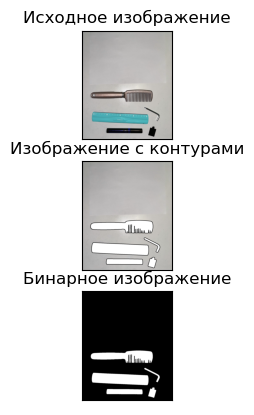

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №1 отсутствует - некуда помещать
2)


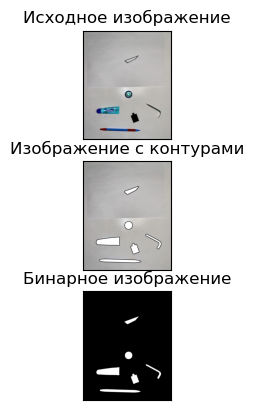

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №2 не вмещает предметы
3)


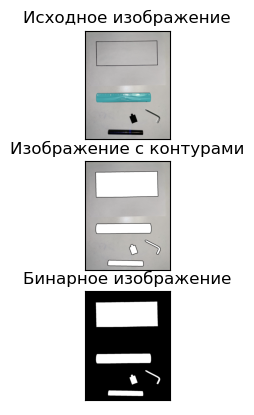

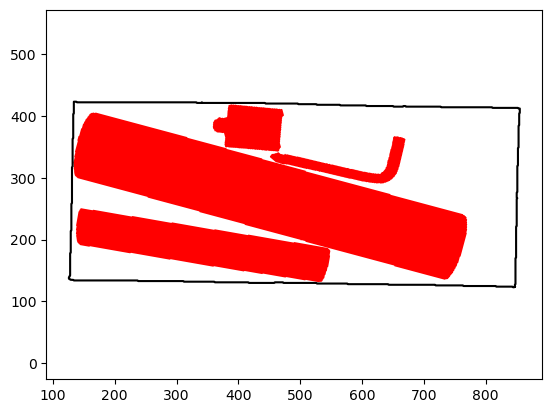

Истинный результат -  True
Полученный результат -  True
Пояснения -  многоугольник на изображении №3 вмещает в себя предметы
4)


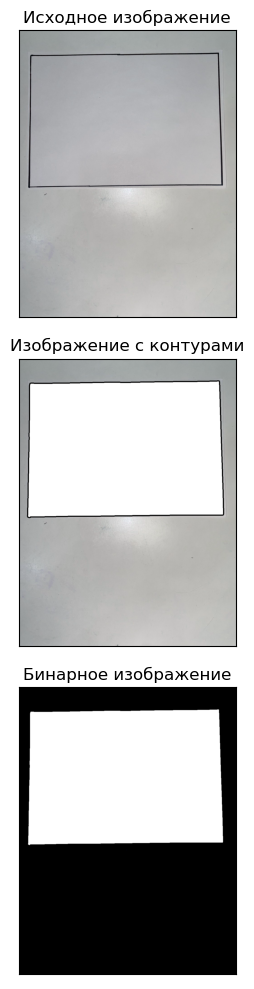

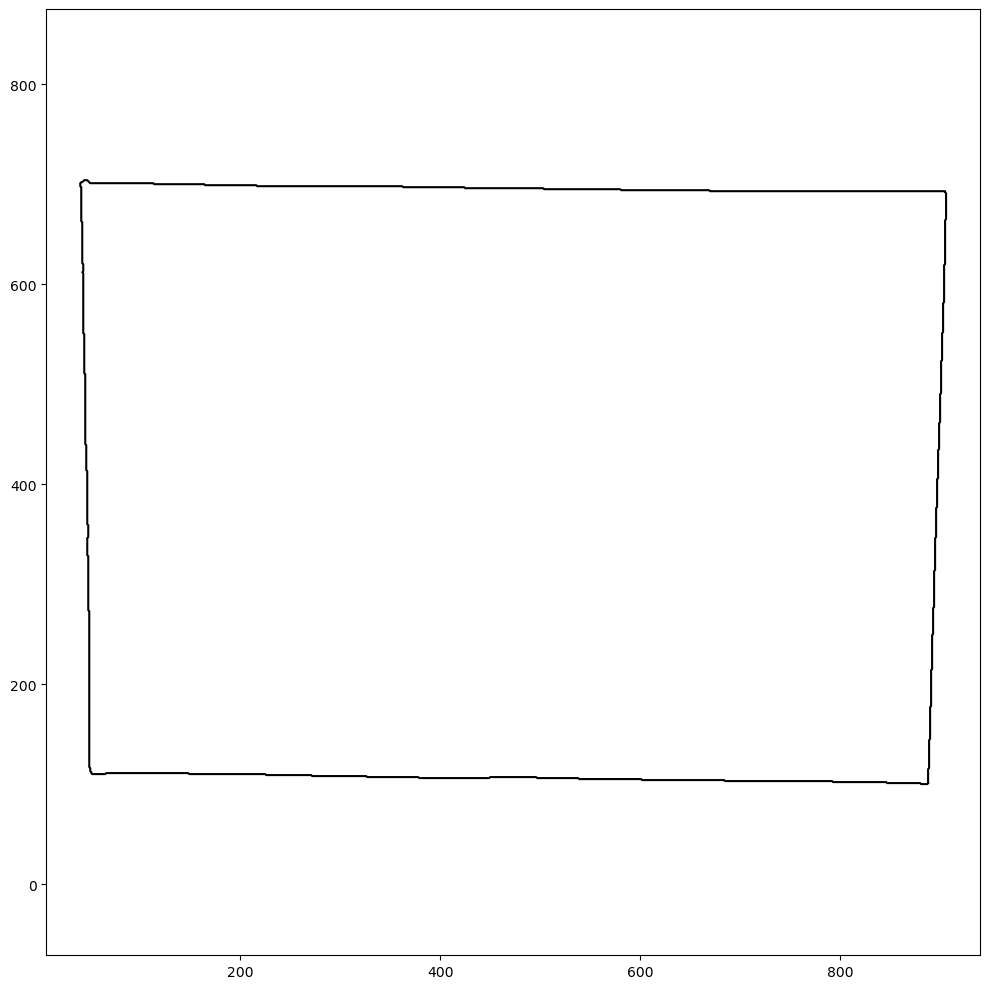

Истинный результат -  False
Полученный результат -  False
Пояснения -  на изображении №4 нет ни одного предмета - нечего помещать во многоугольник
5)


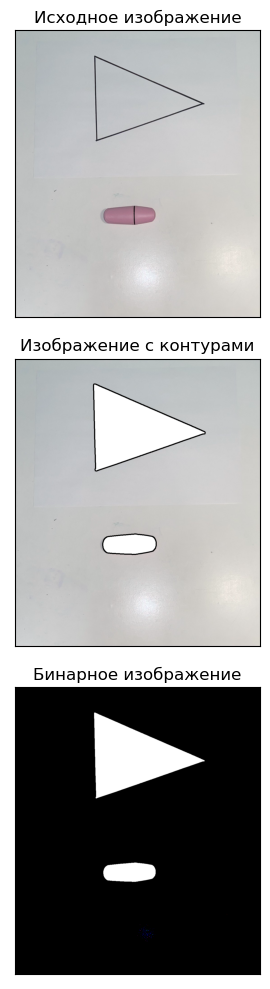

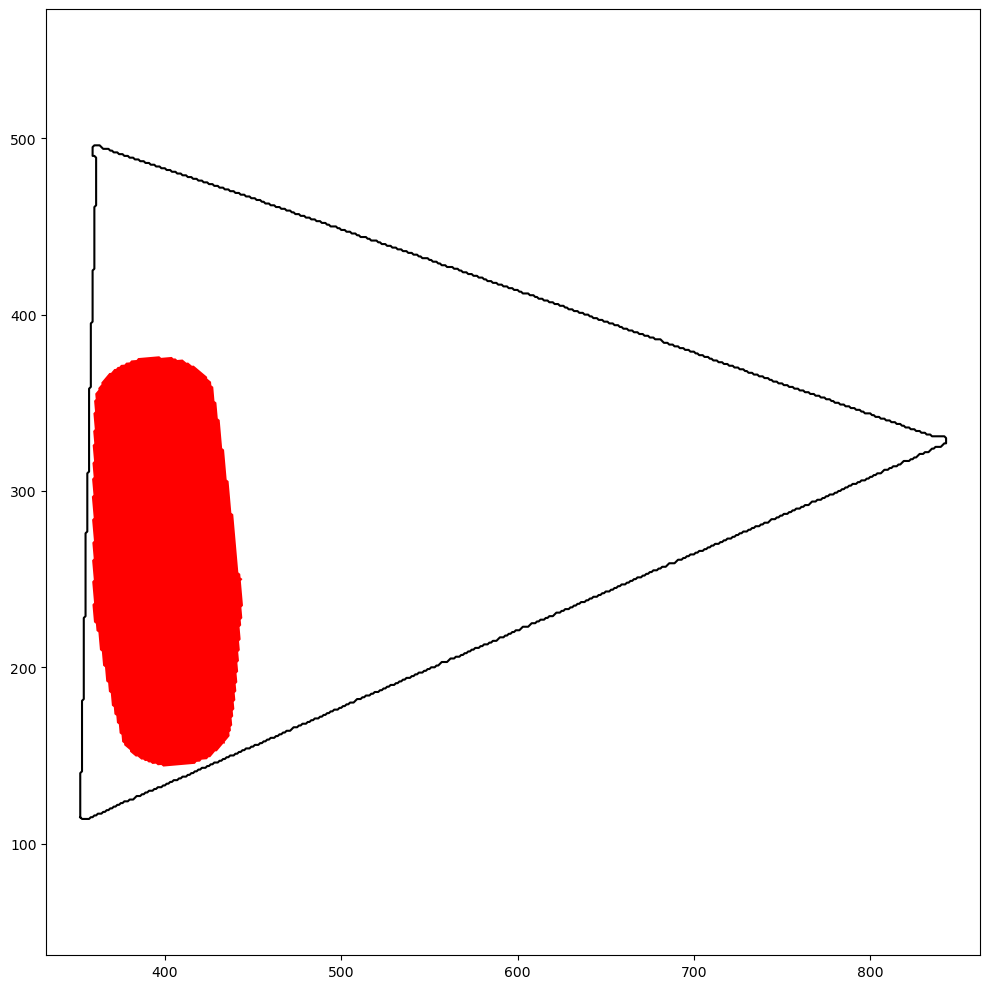

Истинный результат -  True
Полученный результат -  True
Пояснения -  многоугольник на изображении №5 вмещает в себя предмет
6)


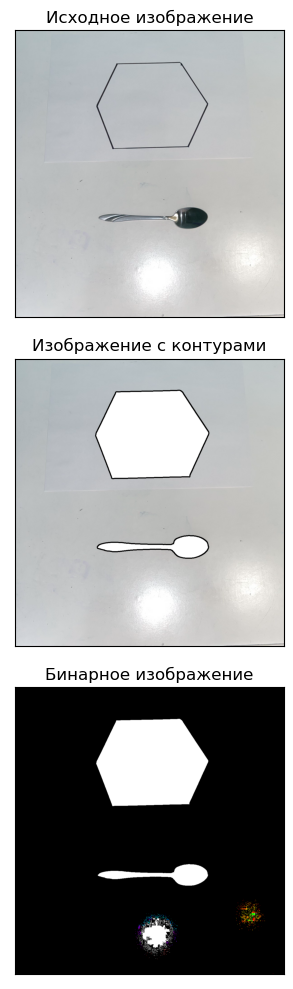

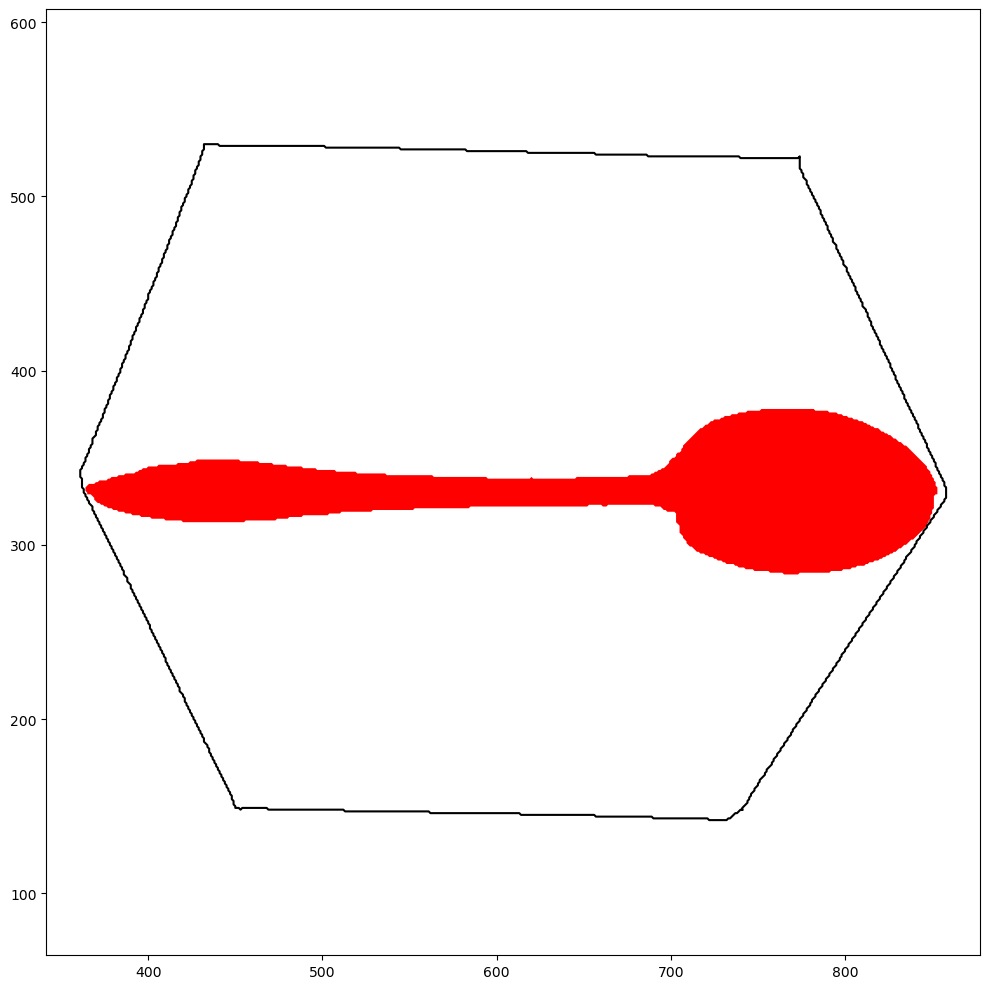

Истинный результат -  True
Полученный результат -  True
Пояснения -  многоугольник на изображении №6 вмещает в себя предмет
7)


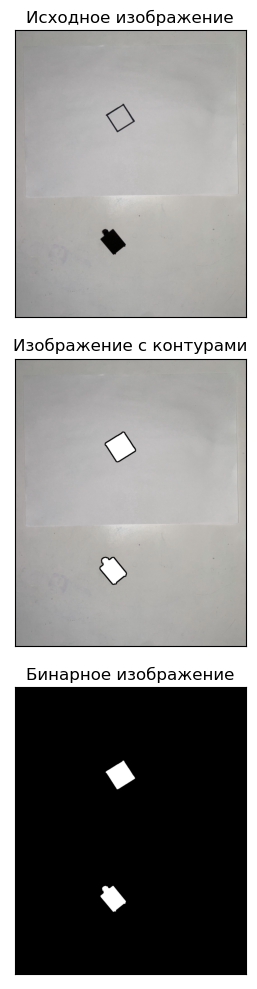

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №7 не вмещает в себя предмет
8)


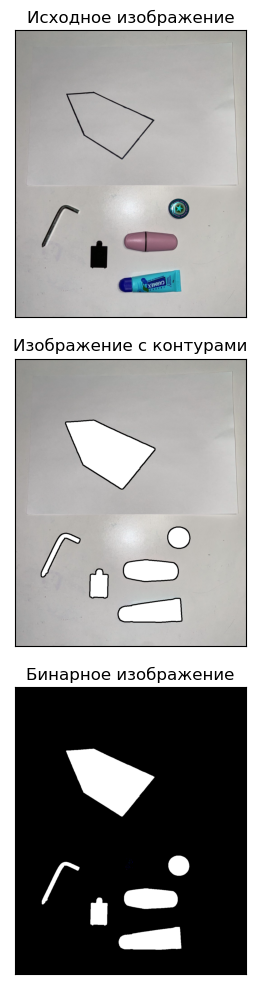

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №8 не вмещает в себя все предметы(только 4 из 5)
9)


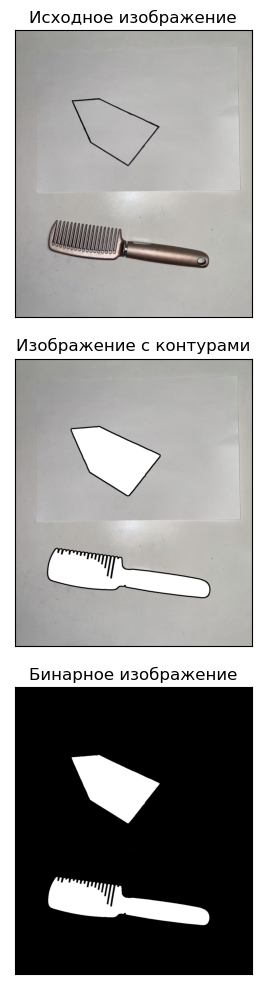

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №9 не вмещает в себя предмет
10)


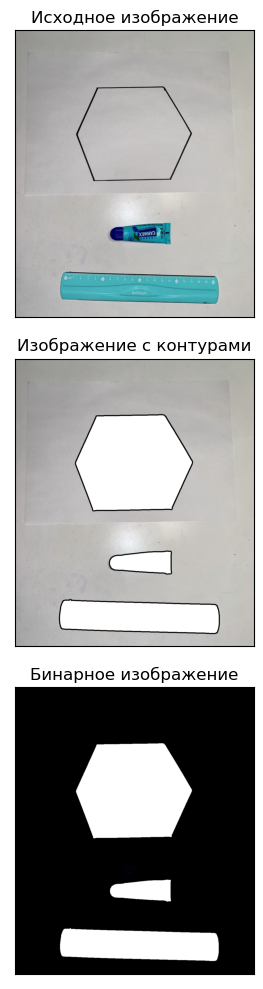

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №10 не вмещает в себя все предметы
11)


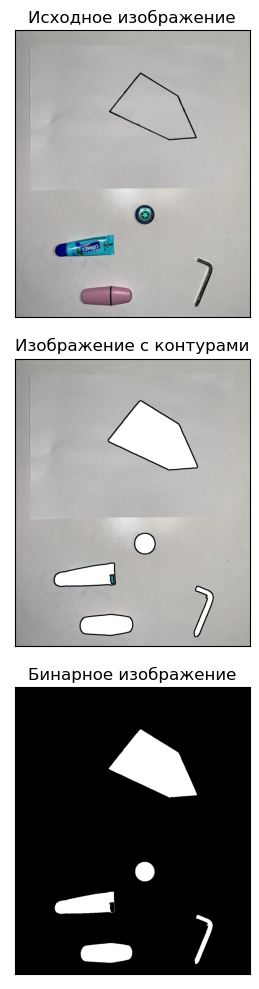

Истинный результат -  True
Полученный результат -  False
Пояснения -  многоугольник на изображении №11 вмещает в себя все предметы
12)


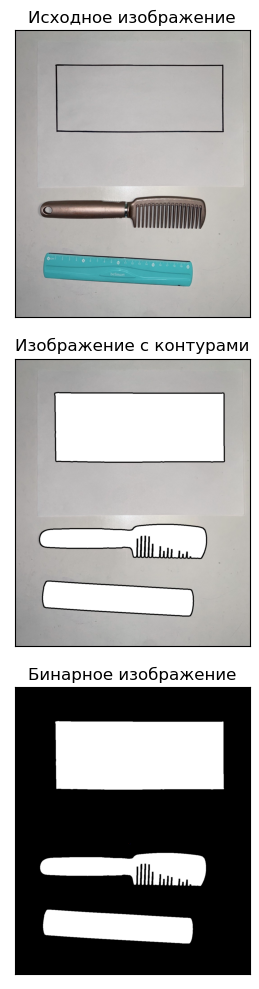

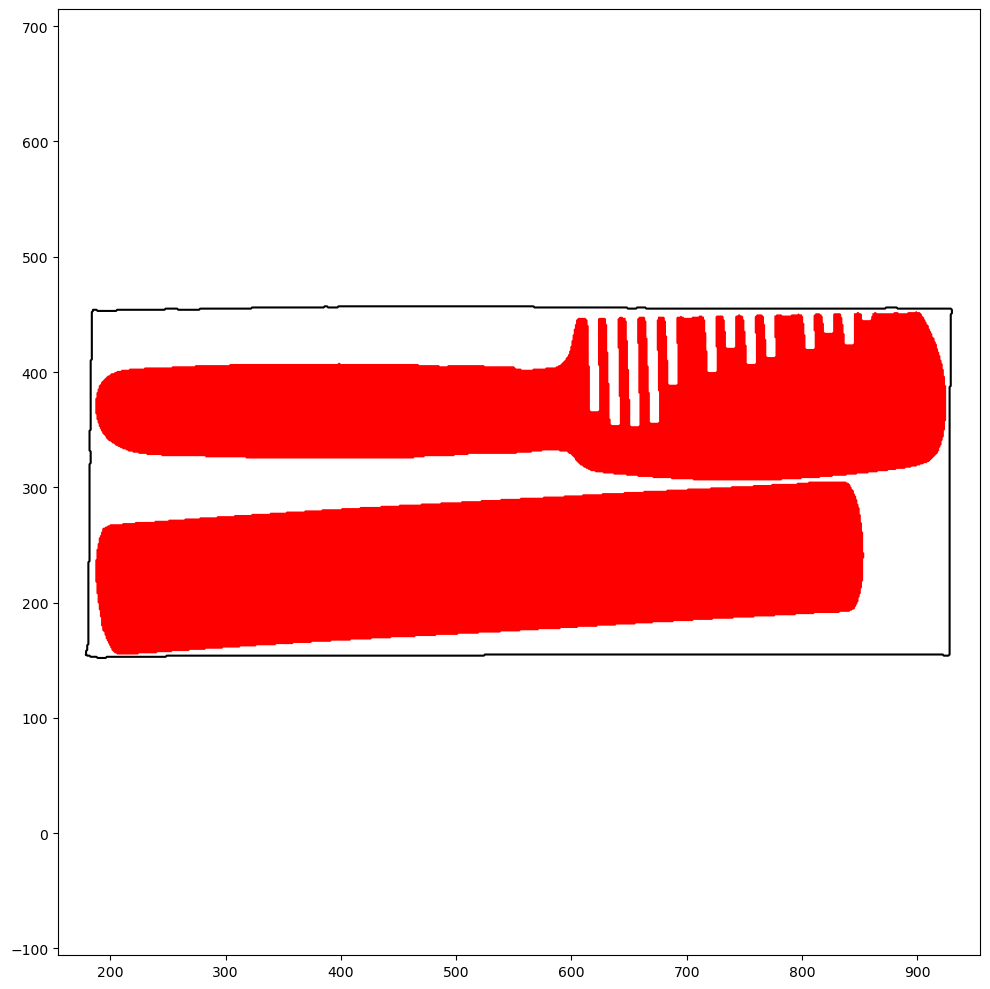

Истинный результат -  True
Полученный результат -  True
Пояснения -  многоугольник на изображении №12 вмещает в себя все предметы
13)


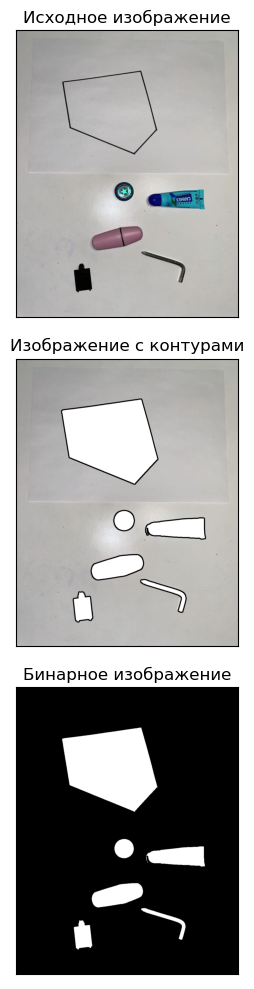

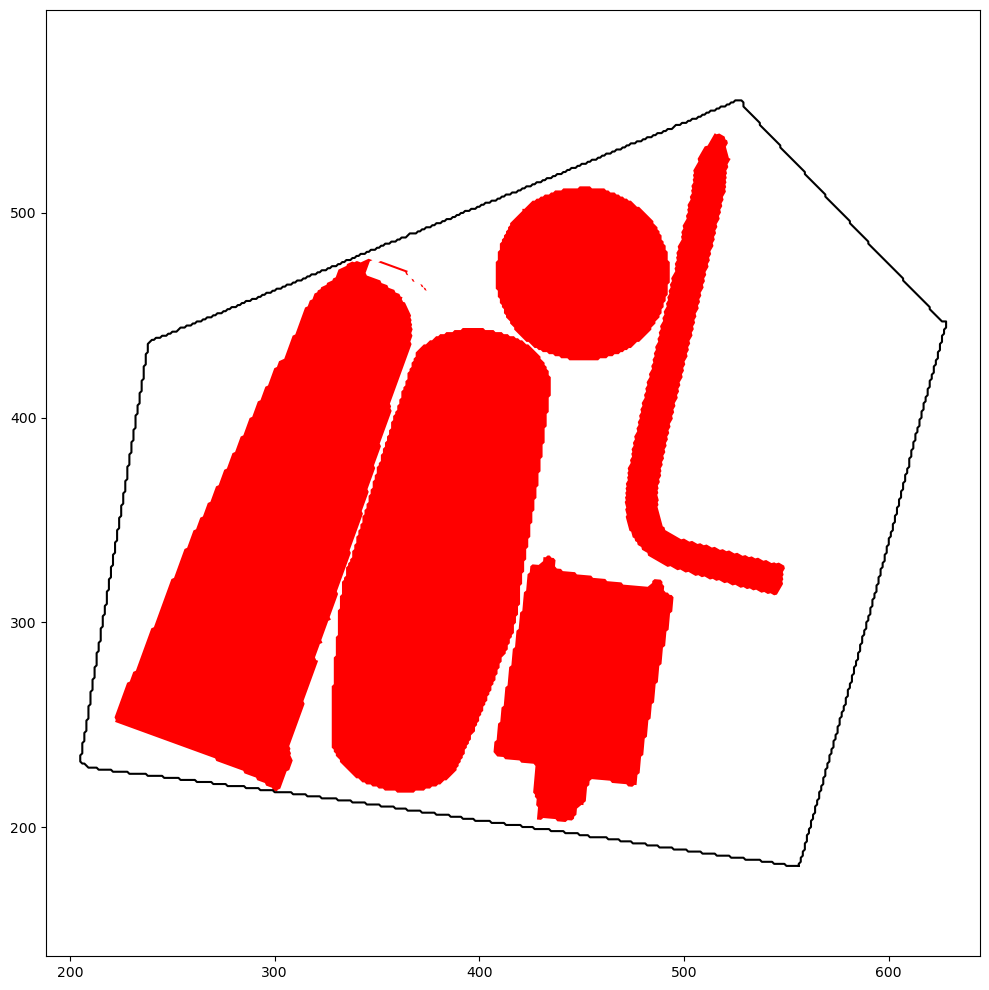

Истинный результат -  True
Полученный результат -  True
Пояснения -  многоугольник на изображении №13 вмещает в себя все предметы


In [5]:
def demonstration_results(path_tests):
    paths = get_paths(path_tests)
    count = 0
    data = pd.read_csv('data/test/label.csv', sep=r'\s*,\s*', header=0, engine='python')
    labels = data['label'].tolist()
    descriptions = data['description'].tolist()
    label = [str(label) for label in labels]
    description = [text for text in descriptions]
    results = []
    for p in paths:
        print(str(count + 1) + ")")
        result = run(str(p))
        print("Истинный результат - ", label[count])
        print("Полученный результат - ", result)
        print("Пояснения - ", description[count])
        results.append(result)
        count = count + 1
    return results, labels


path_tests = Path("data/test")

results, labels = demonstration_results(path_tests)

# Confusion Matrix

Таблица с 4 различными комбинациями прогнозируемых и фактических значений.  
Прогнозируемые значения описываются как положительные и отрицательные, а фактические – как истинные и ложные.

In [6]:
data = pd.read_csv('data/test/label.csv', sep=r'\s*,\s*', header=0, engine='python')

labels = data['label'].tolist()
label = [str(label) for label in labels]

results_ = [str(result) for result in results]

In [7]:
from sklearn import metrics           

confusion_matrix = metrics.confusion_matrix(label, results_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

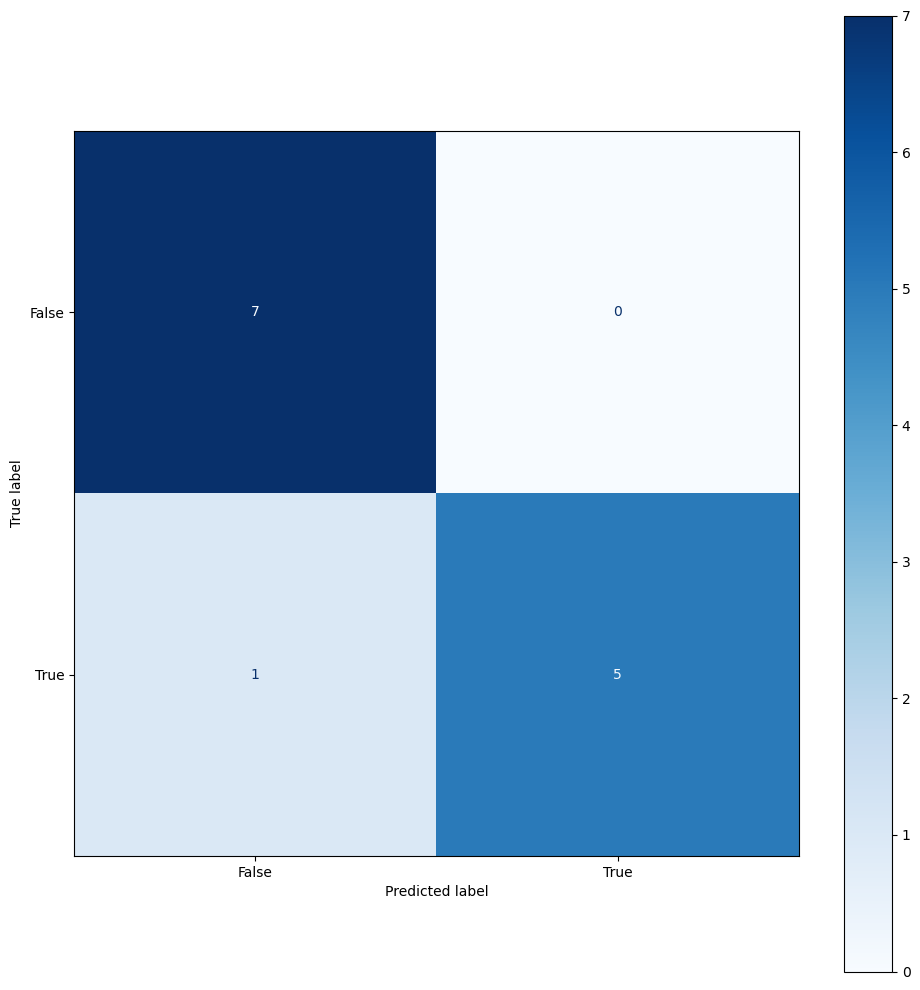

In [8]:
import matplotlib.pyplot as plt

cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Accuracy Metric

### Рассчитывается как отношение количества правильных прогнозов к их общему количеству

Находим число правильных прогнозов:

In [9]:
# счетчик для числа правильных прогнозов
result = 0 

for i in range(len(results)):
    if str(results_[i]).casefold() == label[i].casefold():
        result = result + 1

Считаем accuracy:

In [10]:
accuracy = result / len(labels)

Выведем полученную точность:

In [11]:
accuracy

0.9230769230769231

Можно также посчитать с помощью встроенной функции
Accuracy = metrics.accuracy_score(actual, predicted)

# Промежуточные итоги работы алгоритма

Таким образом, **была достигнута точность в 92.3%** на тестах.  
В целом, результат неплохой, но можно добиться и лучшей точности, если поменять значения шагов вращения и сдвигов, но это, в свою очередь, плохо скажется на производительности.